# Applied Machine Learning (Basic) project - Amrou Abas
## Problem definition

This project seeks to find a model capable of determining as accurately as possible whether an object detected by a sonar is a mine or a rock. Such object will be defined by a set of measurements that have been previously collected by the sonar.

With the resulting model, it is expected to achieve a timely detection of the existence of mines in certain geographical areas, especially in highly populated ones, and for submarines.



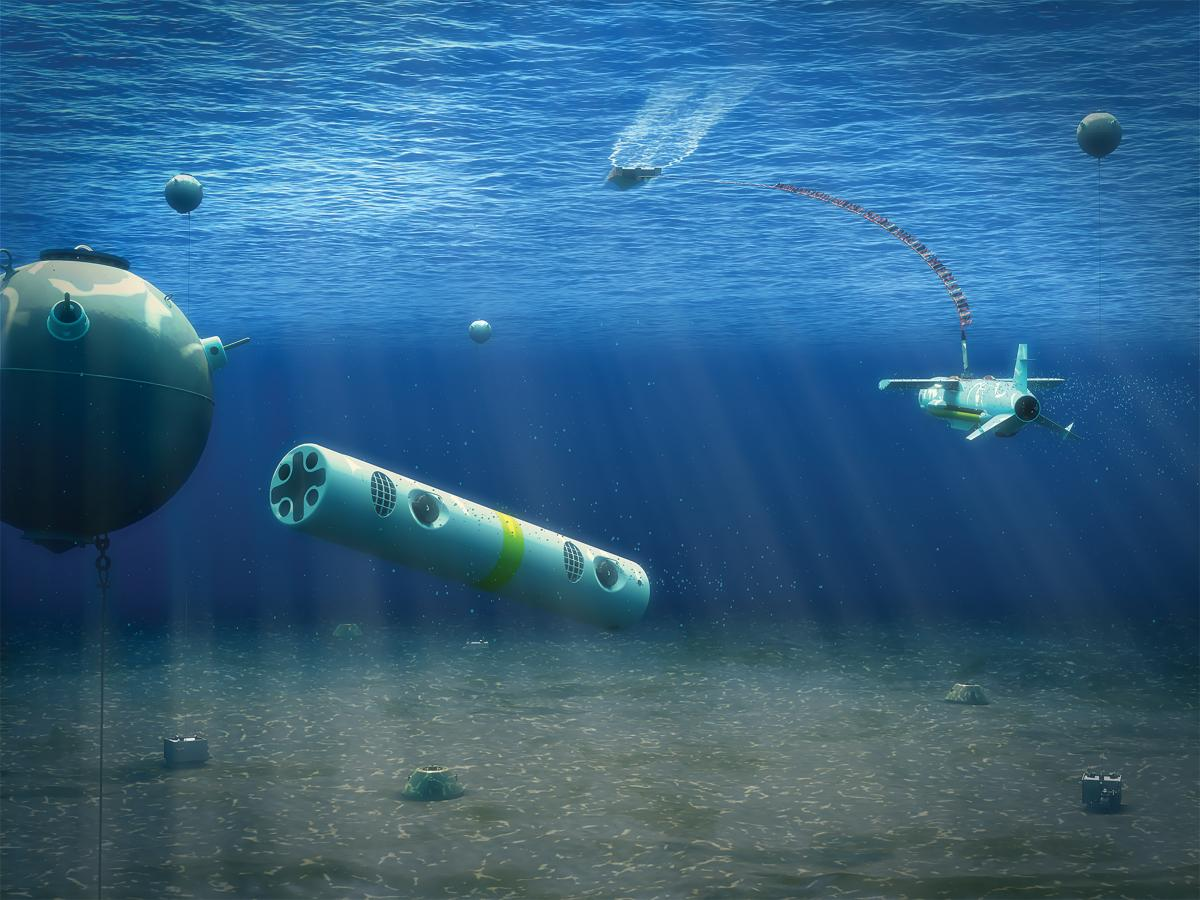



## Dataset Description

The dataset contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. It also contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The dataset contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

The dataset used can be downloaded [clicking here](https://drive.google.com/file/d/1pQxtljlNVh0DHYg-Ye7dtpDTlFceHVfa/view).

## Visualization of Data

In the following steps, we will be able to visualize the data and understand it in a better way.



The first cell is used to install a tool to estimate the time needed to run each cell:

In [4]:
!pip install ipython-autotime
%load_ext autotime

time: 2.44 ms (started: 2022-03-08 02:25:49 +01:00)


In [23]:
# Now some useful libraries are imported:

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import seaborn as sns


time: 476 ms (started: 2022-03-08 02:36:47 +01:00)


In [7]:
'''
Loading the dataset, We are not specifying the names of the attributes. 
This is because other than the class attribute (the last column), the variables do not have
meaningful names. We also indicate that there is no header information, this is to avoid 
file loading code taking the first record as the column names.
'''

df = pd.read_csv("sonar_dataset.csv", header=None)

time: 89.8 ms (started: 2022-03-08 02:26:31 +01:00)


In [8]:
# Top of the dataframe

df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


time: 209 ms (started: 2022-03-08 02:26:35 +01:00)


In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# In the result above, we can see all of the data has the same scale. We can also see that the class attribute (60) has string values.  

In [10]:
# Dimensions of the dataset, the number of rows and columns

print("Number of rows and columns respectively:   ", df.shape)

Number of rows and columns respectively:    (208, 61)
time: 14.4 ms (started: 2022-03-08 02:26:44 +01:00)


In [11]:
# Describe --> statistical measures of the data

df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010


time: 592 ms (started: 2022-03-08 02:26:50 +01:00)


In [12]:
# Breakdown of the data by the class variable (60)

df[60].value_counts() 

M    111
R     97
Name: 60, dtype: int64

time: 36 ms (started: 2022-03-08 02:26:54 +01:00)


In [13]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


time: 247 ms (started: 2022-03-08 02:27:10 +01:00)


In [14]:
# Check if there are any missing values

df.isnull().values.any()

False

time: 41.4 ms (started: 2022-03-08 02:27:14 +01:00)


/home/abas1/Desktop/notebook/jupyterenv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


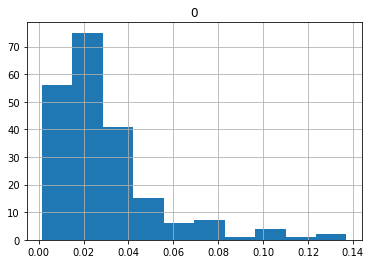

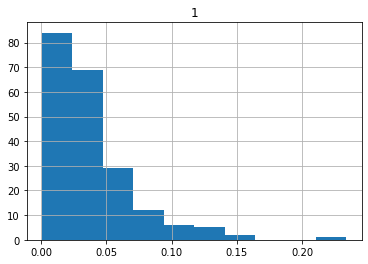

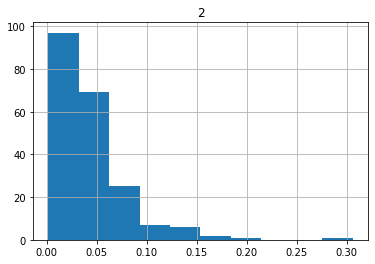

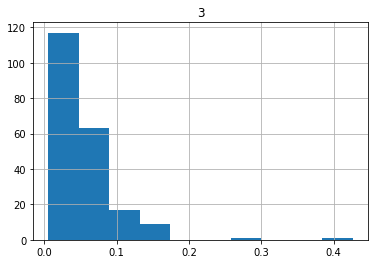

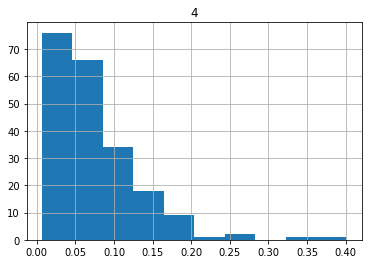

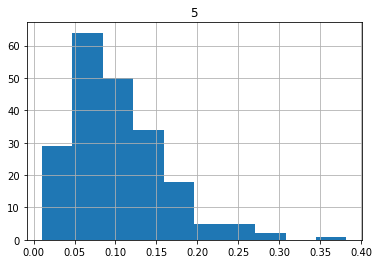

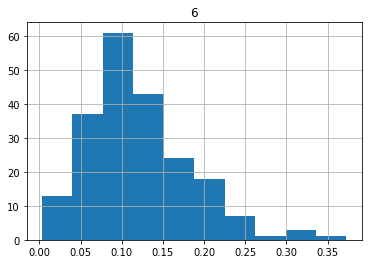

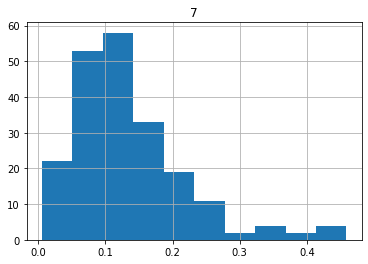

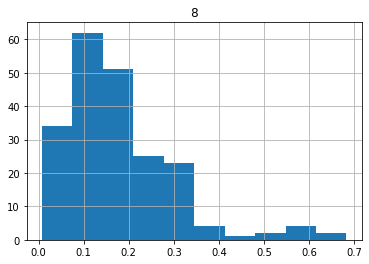

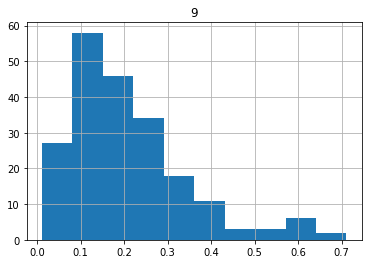

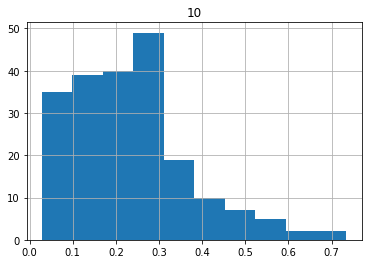

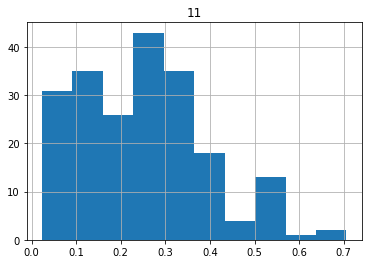

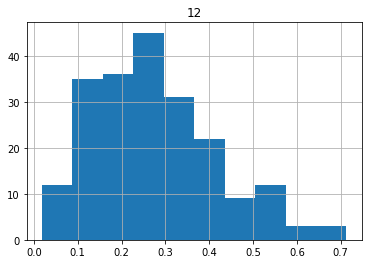

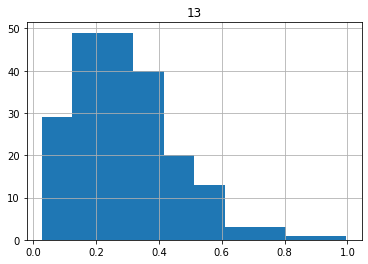

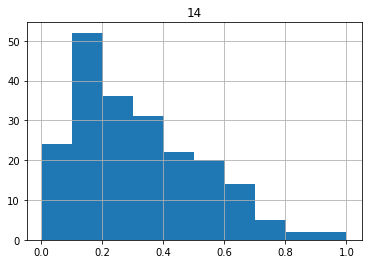

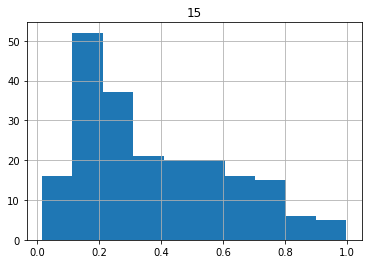

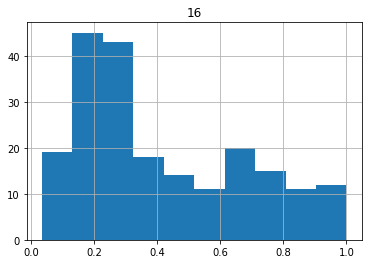

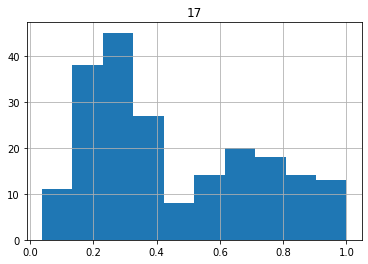

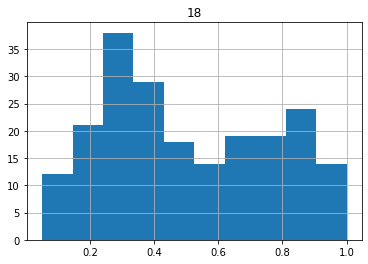

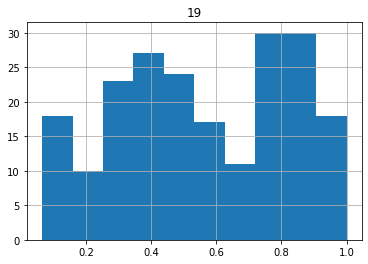

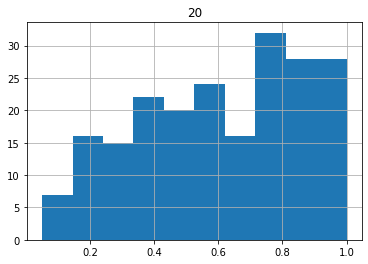

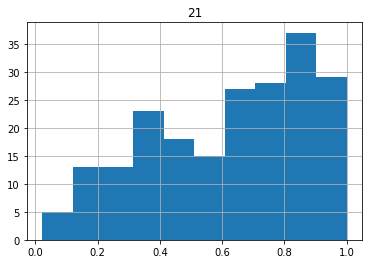

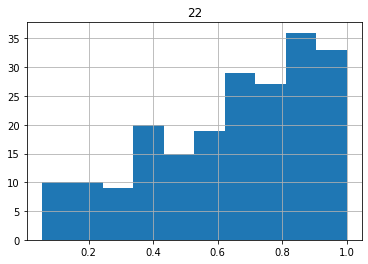

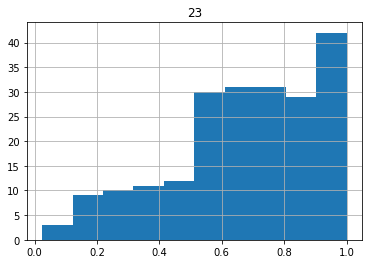

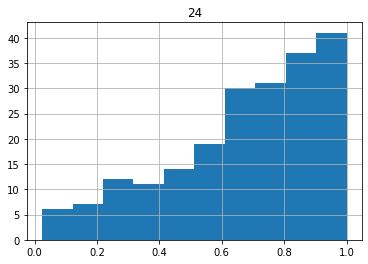

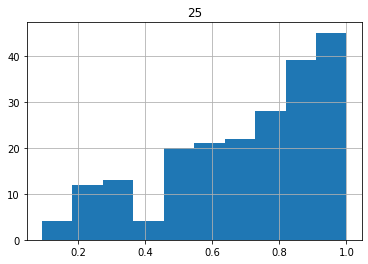

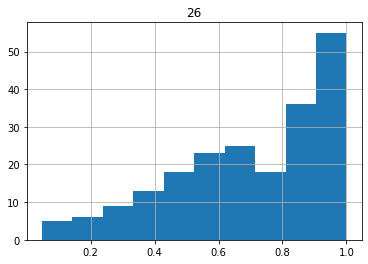

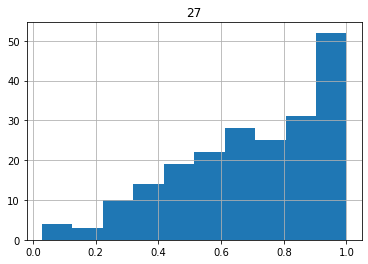

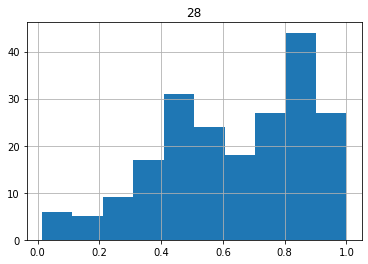

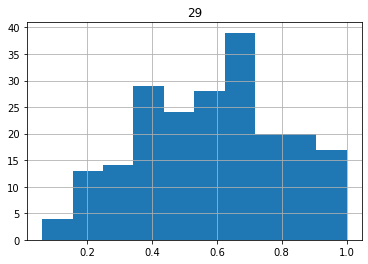

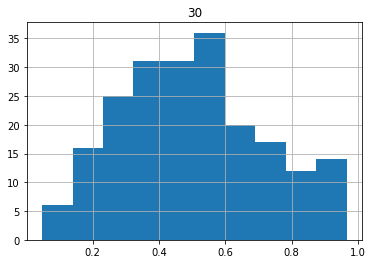

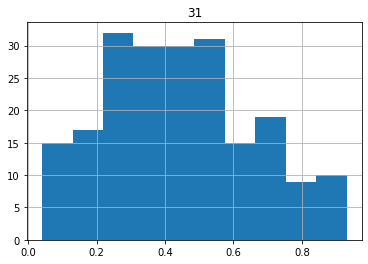

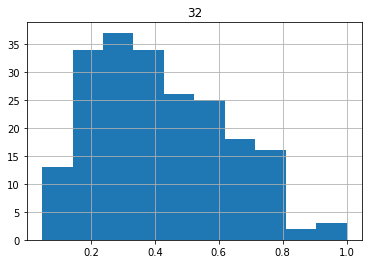

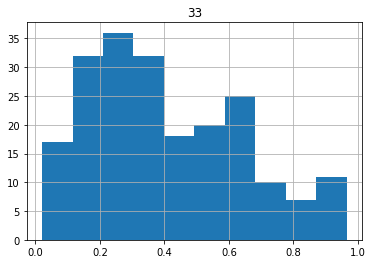

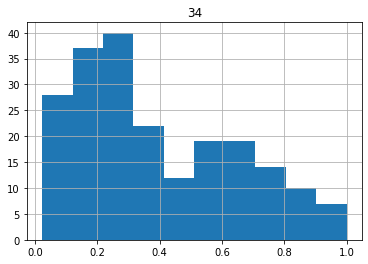

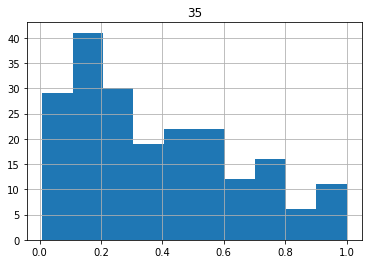

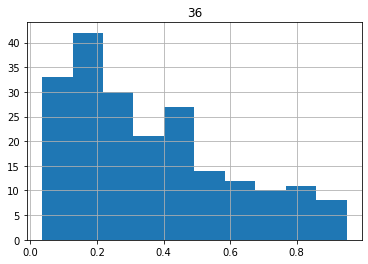

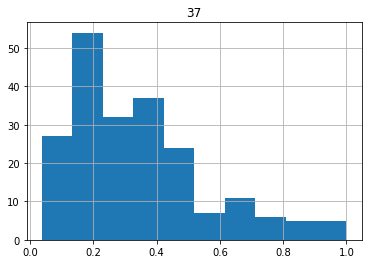

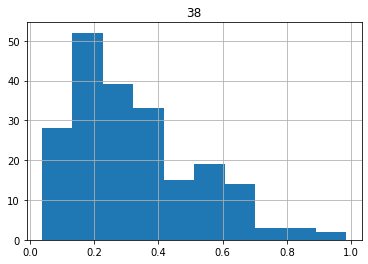

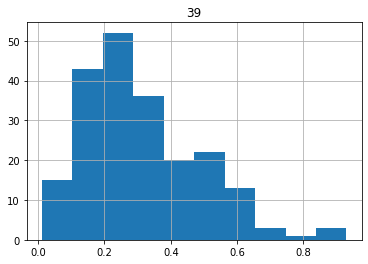

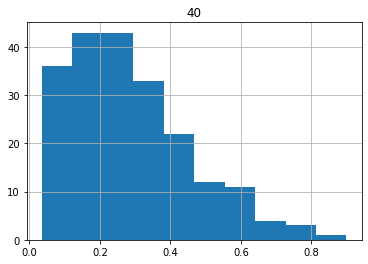

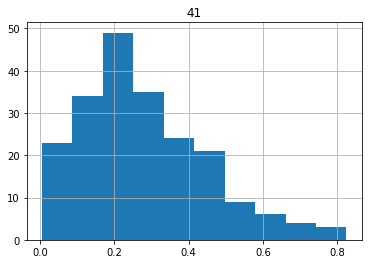

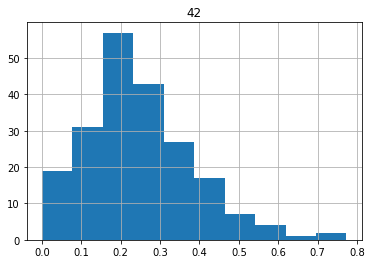

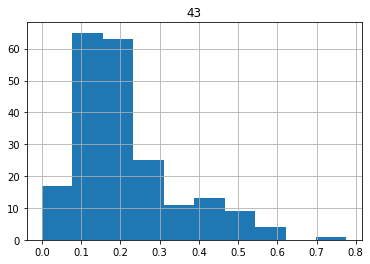

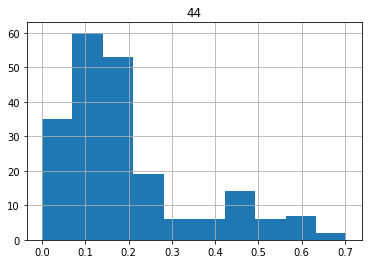

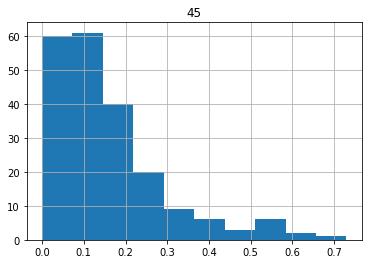

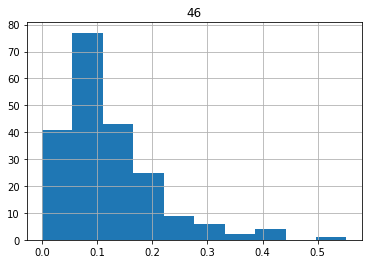

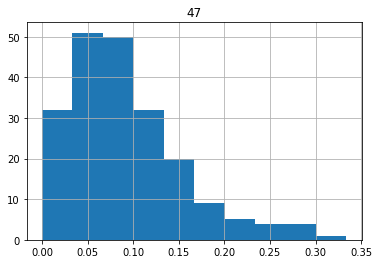

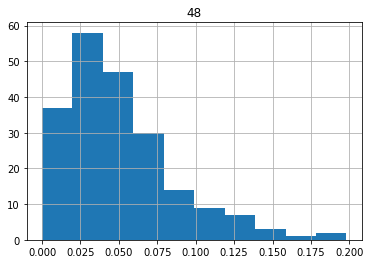

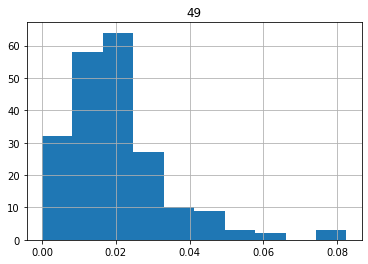

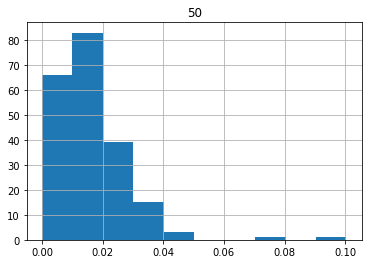

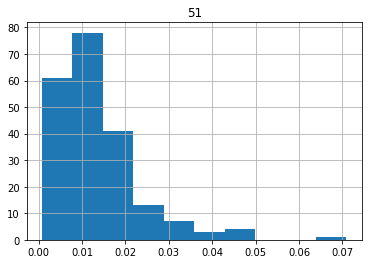

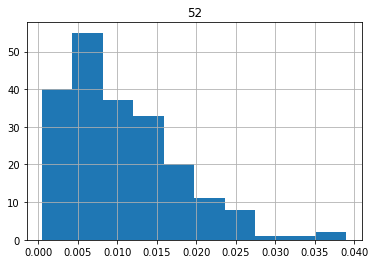

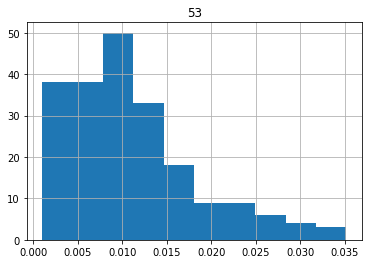

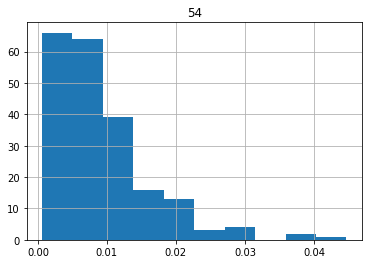

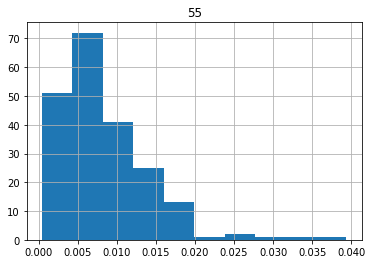

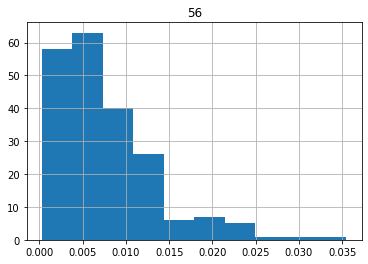

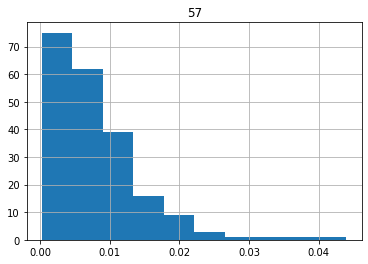

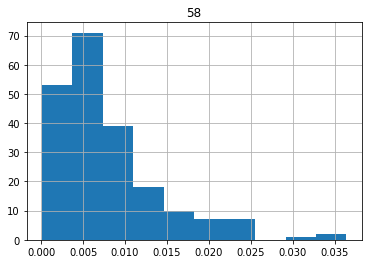

time: 57.1 s (started: 2022-03-08 02:27:19 +01:00)


In [15]:
# Univariate plots: Histograms

for i in range(59):
    df.hist(i)
    


# In these histograms above, a wide variety is observed in the distributions of the attributes existing, for example, distributions that appear to be exponential (such as those of attributes 1, 2, 3, and 4) and others that appear to be Gaussian (albeit skewed, such as those of attributes 6, 7 and 8).


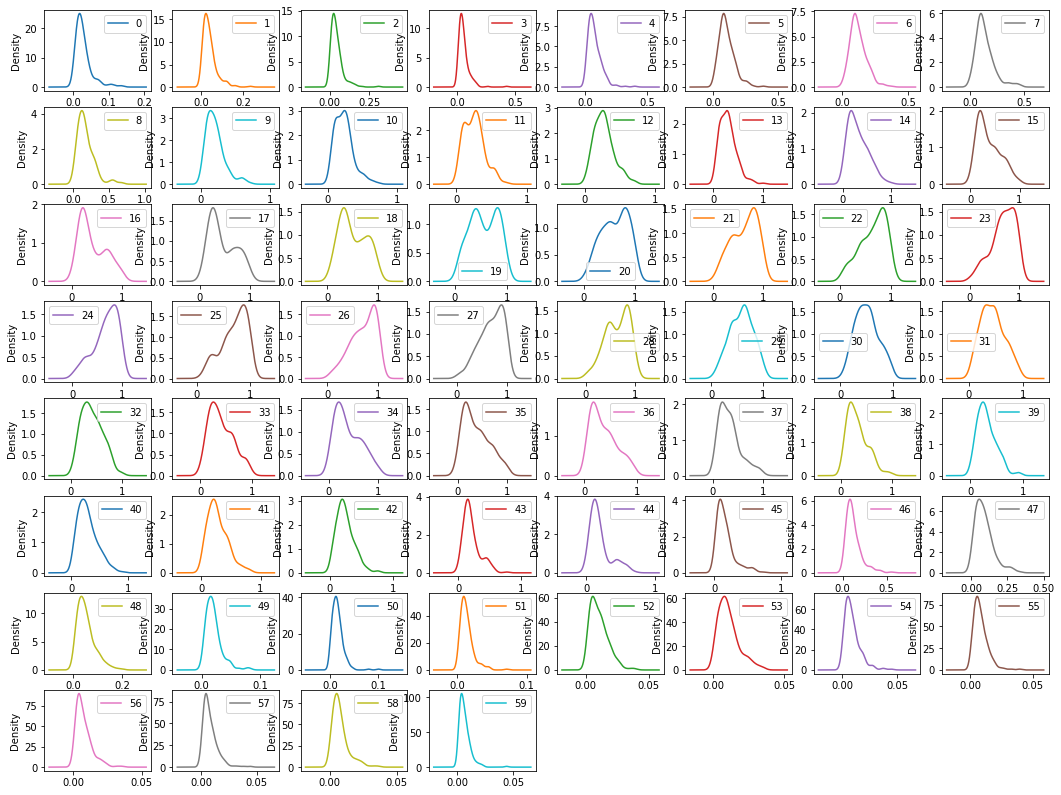

time: 29.1 s (started: 2022-03-08 02:28:27 +01:00)


In [16]:
# Univariate plots: Density plots

df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

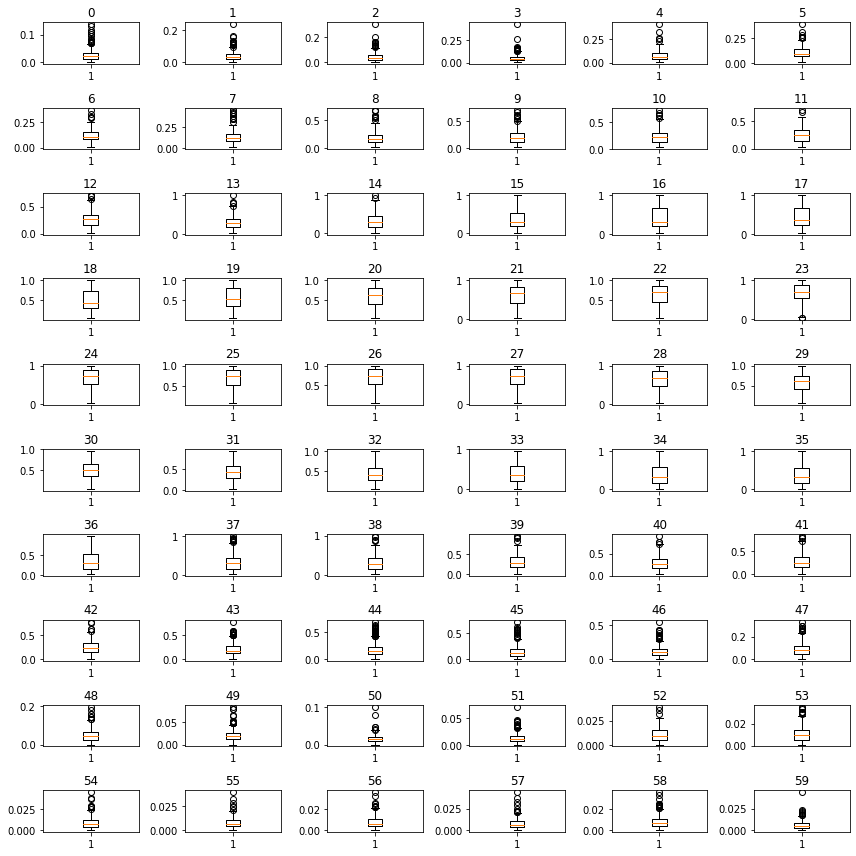

time: 20.3 s (started: 2022-03-08 02:29:15 +01:00)


In [17]:
# Boxplot by attribute

_, axes = plt.subplots(10, 6, figsize=(12, 12))
axes = axes.ravel()

for (col_num, ax) in zip(df.columns[:-1], axes):
    ax.set_title(col_num)
    ax.boxplot(df.iloc[:, col_num])
  
plt.tight_layout()

<AxesSubplot:>

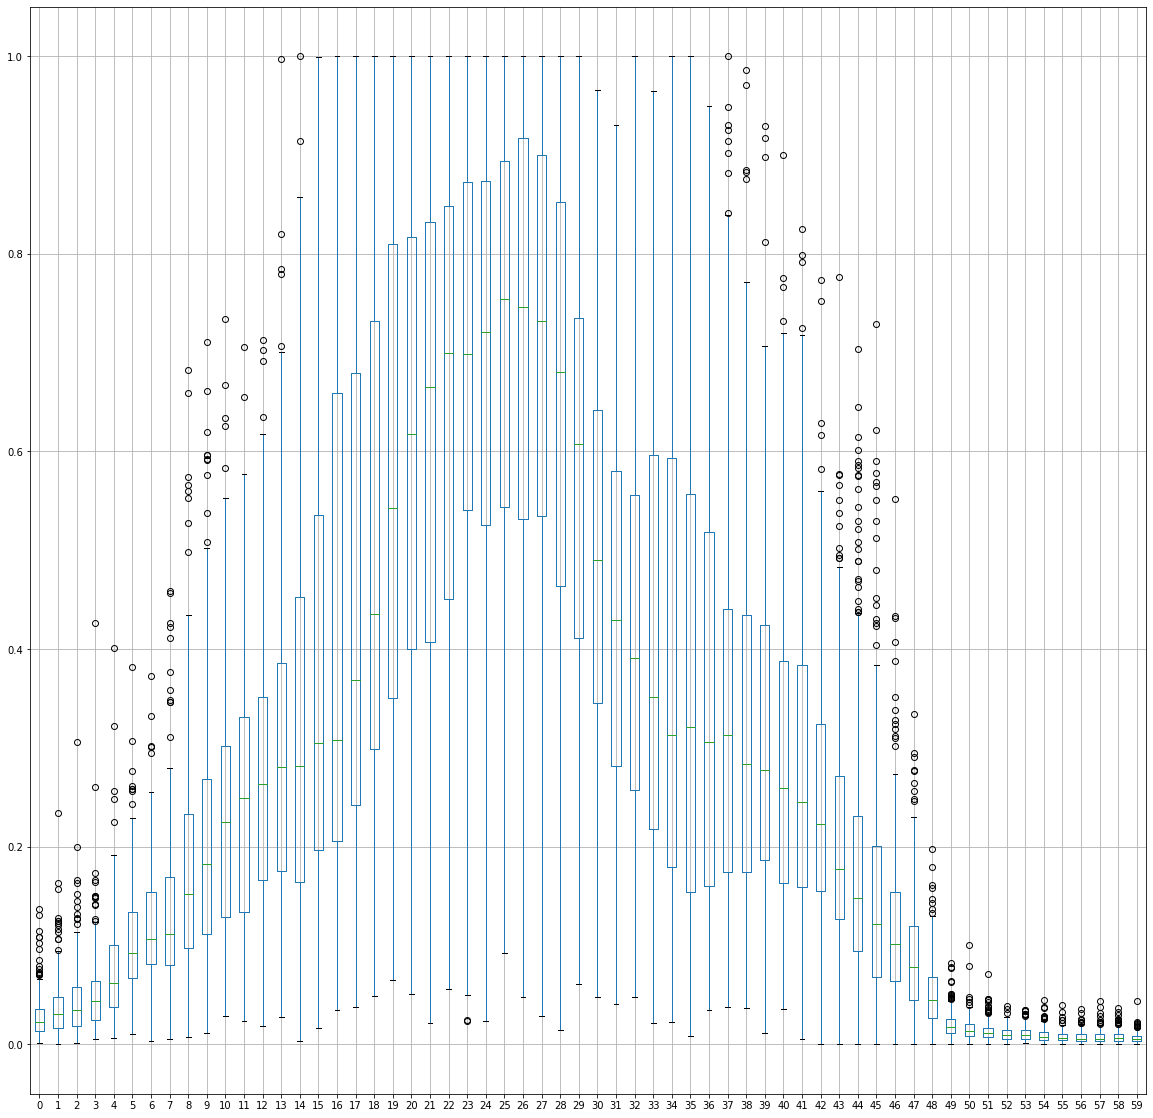

time: 5.05 s (started: 2022-03-08 02:29:49 +01:00)


In [18]:
df.boxplot(figsize=(20, 20))

## Here above, for each attribute, a boxplot is created to visualize how  much its values vary and the possible presence of outliers.

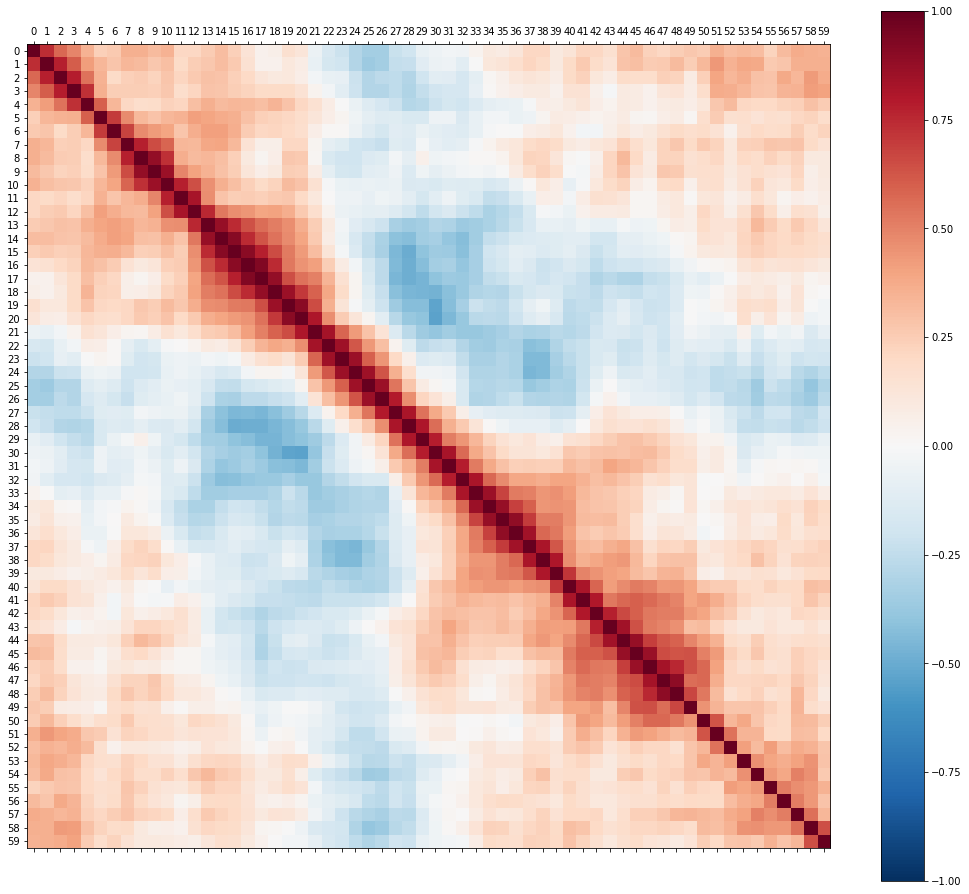

time: 8.95 s (started: 2022-03-08 02:30:14 +01:00)


In [19]:
# Multivariate plots: Correlation matrix

correlations = df.corr()

# Plot correlation matrix

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none', cmap="RdBu_r")
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()


# The matrix above shows the existence of strong positive correlations between adjacent attributes, while between more "distant" attributes, the correlations tend to be negative and weaker.

In [21]:
# Report if there are any duplicates and list all duplicate rows
duplicates = df.duplicated()

if duplicates.any():
    print('We found', len(dataset[duplicates]), 'duplicated instances:')
    print('')
    print(dataset[duplicates])
else:
    print('No duplicated rows were found')

No duplicated rows were found
time: 111 ms (started: 2022-03-08 02:33:07 +01:00)


# In the code above, we checked data cleanliness, the possible presence of repeated instances in the dataset is examined. If so, these will be removed in order to avoid optimistic estimates by candidate models on unseen data.

In [22]:
ds = df.values
X = ds[:,0:60].astype(float)
Y = ds[:,60]

time: 25.9 ms (started: 2022-03-07 17:37:03 +01:00)


In [23]:
print(X[0])
print(Y[0])

[0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
 0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
 0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
 0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032]
R
time: 26.8 ms (started: 2022-03-07 17:37:07 +01:00)


In [26]:
# Encoding labels

# Create a label (category) encoder object:

le = preprocessing.LabelEncoder()

# Fit the encoder onto the pandas column:

le.fit(Y)
print(list(le.classes_))
encoded_Y=le.transform(Y)

print('\n Encoded Labels', encoded_Y)

print("\n", le.inverse_transform([0,1]))

['M', 'R']

 Encoded Labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 ['M' 'R']
time: 23.8 ms (started: 2022-03-07 17:38:27 +01:00)


In [27]:
# baseline model

def create_baseline():
    
    #creating a model
    
    model=Sequential()
    model.add(Dense(60, activation='relu', input_shape=(60,)))
    model.add(Dense(1, activation='sigmoid'))
    
    #compiling it
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

time: 13.2 ms (started: 2022-03-07 17:38:39 +01:00)


In [29]:
# evaluate model with standardized dataset

estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/tmp/ipykernel_5921/3046469832.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)


Results: 85.57% (5.27%)
time: 3min 46s (started: 2022-03-07 17:42:33 +01:00)


In [30]:
# evaluate baseline model with standardized dataset

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/tmp/ipykernel_5921/2635443198.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))


Standardized: 86.07% (5.79%)
time: 3min 42s (started: 2022-03-07 17:46:36 +01:00)


In [31]:
print(len(estimators))

2
time: 6.45 ms (started: 2022-03-07 17:50:34 +01:00)


In [32]:
# Evaluate a small network

# smaller model
def create_smaller():
  #creating a model
    
  model=Sequential()
  model.add(Dense(30, activation='relu', input_shape=(60,)))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/tmp/ipykernel_5921/4208315137.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))


Smaller: 87.00% (8.32%)
time: 3min 44s (started: 2022-03-07 17:50:50 +01:00)


In [33]:
# Evaluate a larger network

# Larger model
def create_larger():
  #creating a model
    
  model=Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


/tmp/ipykernel_5921/1386508449.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))


larger: 85.14% (10.04%)
time: 4min 7s (started: 2022-03-07 17:56:48 +01:00)


In [34]:
# A much larger model


def create_larger():
  #creating a model
    
  model=Sequential()
  model.add(Dense(60, activation='relu', input_shape=(60,)))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
    
  #compiling it
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=250, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/tmp/ipykernel_5921/182719415.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=250, batch_size=5, verbose=0)))


larger: 87.10% (7.64%)
time: 16min 18s (started: 2022-03-07 18:38:53 +01:00)


In [35]:
# Tuned Model


def create_baseline():
    #creating a model
    
    model=Sequential()
    model.add(Dense(60, activation='relu', input_shape=(60,)))
    model.add(Dense(1, activation='sigmoid'))
    
    #compiling it
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

  
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=40, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Tuned model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



/tmp/ipykernel_5921/2986162828.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=40, batch_size=5, verbose=0)))


Tuned model: 87.48% (7.51%)
time: 2min 47s (started: 2022-03-07 18:55:21 +01:00)


### The best result of our model was after tunning is 87.48%, hence, the model would predict the object at this percentage which is excellent.